In [1]:
import numpy as np
import pandas as pd
import subprocess as sp
import os
from scipy.stats import zscore
import seaborn as sb
import matplotlib.cm as cm
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from collections import Counter


plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

In [3]:
rsem_dir = '/mnt/lareaulab/cfbuenabadn/RNASeq/Mouse/ChenRNASeq/gene_expression/ChenRSEM/'
samples = os.listdir(rsem_dir)
tpm_tab = pd.DataFrame()
rcount_tab = pd.DataFrame()

for sample in samples:
    rsem_tab = pd.read_table(rsem_dir + sample + '/rsem_output/rsem_output.genes.results', index_col=0)
    tpm_tab[sample] = rsem_tab.TPM
    tpm_tab.index = rsem_tab.index
    
    rcount_tab[sample] = rsem_tab.expected_count
    rcount_tab.index = rsem_tab.index
    



/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  import sys


In [4]:
#tpm_tab.index = [x.split('.')[0] for x in tpm_tab.index]
#rcount_tab.index = [x.split('.')[0] for x in rcount_tab.index]

tpm_tab = tpm_tab[sorted(tpm_tab.columns)]
rcount_tab = rcount_tab[sorted(rcount_tab.columns)]

tpm_tab = tpm_tab.sort_index()
rcount_tab = rcount_tab.sort_index()

In [15]:
tpm_tab.index = [x.split('.')[0] for x in tpm_tab.index]
rcount_tab.index = [x.split('.')[0] for x in rcount_tab.index]

In [16]:
tpm_tab.to_csv('new_rsem_tpm.tab', sep='\t', header=True, index=True)
rcount_tab.to_csv('new_rsem_count.tab', sep='\t', header=True, index=True)

In [26]:
table = rcount_tab
mm10_mart = pd.read_csv('~/Genomes/Mouse/Gencode/mm10.ensembl_gene_symbols.tab', sep='\t', index_col=0)
mm10_clean = mm10_mart.drop_duplicates()
mm10_clean = mm10_clean.groupby(mm10_clean.index).first()

good_genes = [x for x in table.index if x in mm10_clean.index]
table_filtered = table.loc[good_genes]
table_filtered.index = mm10_clean.loc[good_genes].mgi_symbol

table_filtered.to_csv('chen.rsemCounts.gene_symbols.tab', sep='\t', header=True, index=True)

In [27]:
reads_dir = '/mnt/lareaulab/cfbuenabadn/RNASeq/Mouse/ChenRNASeq/gene_expression/ChenRSEM/'
samples = sorted(os.listdir(reads_dir))

table = pd.DataFrame()
for sample in samples:
    tabla = pd.read_csv(os.path.join(reads_dir,sample, 'rsem_output/rsem_output.genes.results'), sep = '\t', index_col=0)
    table[sample] = tabla['effective_length']

    
table.index = [x.split('.')[0] for x in table.index]
mm10_mart = pd.read_csv('~/Genomes/Mouse/Gencode/mm10.ensembl_gene_symbols.tab', sep='\t', index_col=0)
mm10_clean = mm10_mart.drop_duplicates()
mm10_clean = mm10_clean.groupby(mm10_clean.index).first()

good_genes = [x for x in table.index if x in mm10_clean.index]
table_filtered = table.loc[good_genes]
table_filtered.index = mm10_clean.loc[good_genes].mgi_symbol

table_filtered.to_csv('chen.effective_length.gene_symbols.tab', sep='\t', header=True, index=True)

In [6]:
old_tpm_tab = pd.read_csv('rsem_tpm.tab', sep='\t', index_col=0)
old_rcount_tab = pd.read_csv('rsem_count.tab', sep='\t', index_col=0)

In [8]:
old_tpm_tab[tpm_tab.columns].to_csv('old_rsem_tpm.tab', sep='\t', header=True, index=True)
old_rcount_tab[rcount_tab.columns].to_csv('old_rsem_count.tab', sep='\t', header=True, index=True)

In [97]:
# tpm_tab.to_csv('rsem_tpm.tab', sep='\t', header=True, index=True)
# rcount_tab.to_csv('rsem_count.tab', sep='\t', header=True, index=True)

In [12]:
old_tpm_tab[tpm_tab.columns].shape

(48440, 488)

In [21]:
(tpm_tab - old_tpm_tab[tpm_tab.columns]).min().min()

0.0

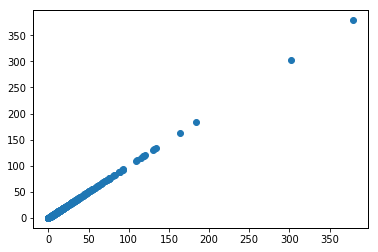

In [23]:
plt.scatter(tpm_tab.loc['ENSMUSG00000064702'], old_tpm_tab.loc['ENSMUSG00000064702', tpm_tab.columns])
plt.show()

In [25]:
(tpm_tab.loc['ENSMUSG00000064702'] - old_tpm_tab.loc['ENSMUSG00000064702', tpm_tab.columns]).mean()

0.0

In [13]:
sra_tab = pd.read_table('~/RNASeq/Mouse/ChenRNASeq/RSEM_pipeline/SraRunTable.txt', index_col=5, sep='\t')


,BioSample_s,Experiment_s,LoadDate_s,MBases_l,MBytes_l,SRA_Sample_s,Sample_Name_s,Sex_s,cell_type_s,strain_s,...,InsertSize_l,Instrument_s,LibraryLayout_s,LibrarySelection_s,LibrarySource_s,Organism_s,Platform_s,ReleaseDate_s,SRA_Study_s,source_name_s
Run_s,,,,,,,,,,,,,,,,,,,,,
SRR2727279,SAMN04194527,SRX1355026,2015-10-19,122,134,SRS1121171,GSM1912082,male,Epi,male CAST/EiJ x female C57BL/6J,...,0,Illumina HiSeq 2000,SINGLE,cDNA,TRANSCRIPTOMIC,Mus musculus,ILLUMINA,2016-07-27,SRP064979,embryo
SRR2727278,SAMN04194526,SRX1355025,2015-10-19,112,122,SRS1121172,GSM1912081,male,Epi,male CAST/EiJ x female C57BL/6J,...,0,Illumina HiSeq 2000,SINGLE,cDNA,TRANSCRIPTOMIC,Mus musculus,ILLUMINA,2016-07-27,SRP064979,embryo
SRR2727277,SAMN04194525,SRX1355024,2015-10-19,230,249,SRS1121173,GSM1912080,male,Epi,male CAST/EiJ x female C57BL/6J,...,0,Illumina HiSeq 2000,SINGLE,cDNA,TRANSCRIPTOMIC,Mus musculus,ILLUMINA,2016-07-27,SRP064979,embryo
SRR2727276,SAMN04194524,SRX1355023,2015-10-19,346,371,SRS1121174,GSM1912079,male,Epi,male CAST/EiJ x female C57BL/6J,...,0,Illumina HiSeq 2000,SINGLE,cDNA,TRANSCRIPTOMIC,Mus musculus,ILLUMINA,2016-07-27,SRP064979,embryo
SRR2727275,SAMN04194523,SRX1355022,2015-10-19,363,383,SRS1121175,GSM1912078,female,ES,male CAST/EiJ x female C57BL/6J,...,0,Illumina HiSeq 2000,SINGLE,cDNA,TRANSCRIPTOMIC,Mus musculus,ILLUMINA,2016-07-27,SRP064979,embryo


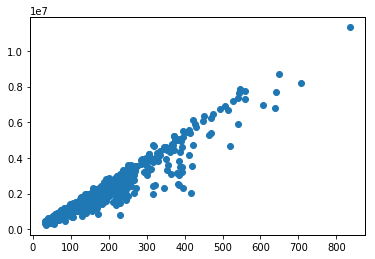

In [112]:
plt.scatter(sra_tab.sort_index().MBases_l, count_tab.sum())
plt.show()

In [ ]:
STAR_pipeline/*/star_output/ReadsPerGene.out.tab

In [ ]:
prueba = pd.read_table('../STAR_pipeline/SRR2727212/star_output/ReadsPerGene.out.tab', sep='\t', header=None, skiprows=4)

In [ ]:
plt.scatter(np.log1p(prueba[1]),np.log1p(tpm_tab['SRR2727212']))
plt.show()

In [75]:
grep_unique = """grep 'Uniquely mapped reads %' ../STAR_pipeline/{sample}/star_output/Log.final.out | awk -F'\t' '{print $2}'"""
grep_mm = """grep '% of reads mapped to multiple loci' ../STAR_pipeline/{sample}/star_output/Log.final.out | awk -F'\t' '{print $2}'"""
grep_sj = """grep 'Number of splices: Total' ../STAR_pipeline/{sample}/star_output/Log.final.out | awk -F'\t' '{print $2}'"""
grep_ansj = """grep 'Number of splices: Annotated (sjdb)' ../STAR_pipeline/{sample}/star_output/Log.final.out | awk -F'\t' '{print $2}'"""
grep_gtag = """grep 'Number of splices: GT/AG' ../STAR_pipeline/{sample}/star_output/Log.final.out | awk -F'\t' '{print $2}'"""
grep_gcag = """grep 'Number of splices: GC/AG' ../STAR_pipeline/{sample}/star_output/Log.final.out | awk -F'\t' '{print $2}'"""
grep_atac = """grep 'Number of splices: AT/AC' ../STAR_pipeline/{sample}/star_output/Log.final.out | awk -F'\t' '{print $2}'"""
grep_ncsj = """grep 'Number of splices: Non-canonical' ../STAR_pipeline/{sample}/star_output/Log.final.out | awk -F'\t' '{print $2}'"""
grep_ncsj = """grep 'Number of splices: Non-canonical' ../STAR_pipeline/{sample}/star_output/Log.final.out | awk -F'\t' '{print $2}'"""

star_dir = '../STAR_pipeline/'
samples = os.listdir(star_dir)
count_tab = pd.DataFrame()

for sample in samples:
    star_tab = pd.read_table(star_dir + sample + '/star_output/ReadsPerGene.out.tab', sep='\t', 
                             header=None, index_col=0, skiprows=4)
    count_tab[sample] = star_tab[1]
    count_tab.index = star_tab.index
    
    


In [82]:
count_tab.index = [x.split('.')[0] for x in count_tab.index]
count_tab = count_tab[sorted(count_tab.columns)]

count_tab = count_tab.sort_index()

In [ ]:
count_tab.to_csv('star_counts.tab', sep='\t', header=True, index=True)

In [129]:
meta = pd.DataFrame()
meta['cell_type'] = sra_tab.cell_type_s
meta['sex'] = sra_tab.Sex_s
meta['strain'] = sra_tab.strain_s
meta['batch'] = sra_tab.LoadDate_s
meta['MBases'] = sra_tab.MBases_l
meta['rsem_counts'] = rcount_tab.sum()
meta['star_counts'] = count_tab.sum()

meta = meta.sort_index()

meta = meta.fillna('-')

meta.to_csv('meta.tab', sep='\t', index=True, header=True)

In [127]:
meta.fillna('-').sex.unique()

array(['male', 'female', '-'], dtype=object)

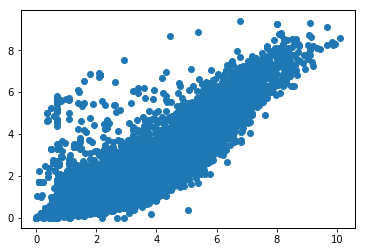

In [130]:
plt.scatter(np.log1p(rcount_tab['SRR3211914']), np.log1p(tpm_tab['SRR3211914']))
plt.show()

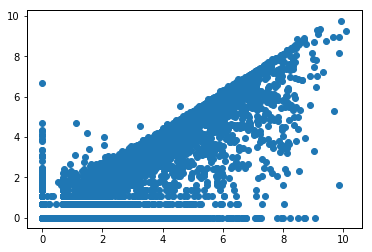

In [131]:
plt.scatter(np.log1p(rcount_tab['SRR3211914']), np.log1p(count_tab['SRR3211914']))
plt.show()

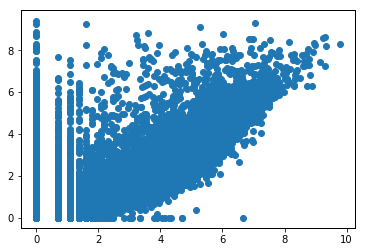

In [132]:
plt.scatter(np.log1p(count_tab['SRR3211914']), np.log1p(tpm_tab['SRR3211914']))
plt.show()

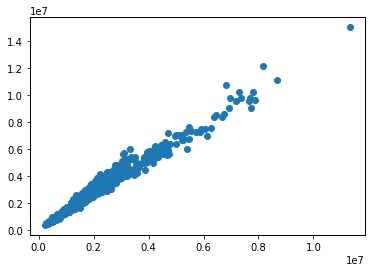

In [133]:
plt.scatter(count_tab.sum(), rcount_tab.sum())
plt.show()

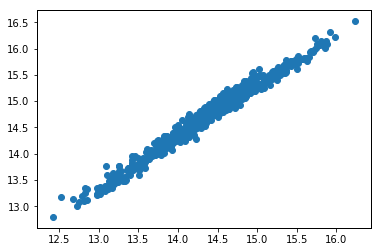

In [134]:
plt.scatter(np.log1p(count_tab.sum()), np.log1p(rcount_tab.sum()))
plt.show()

In [103]:
tpm_tab.sum()

SRR2727045    1000000.53
SRR2727046     999999.59
SRR2727047     999999.52
SRR2727048    1000000.06
SRR2727049     999999.85
SRR2727050     999999.98
SRR2727051     999999.49
SRR2727052     999999.86
SRR2727053     999999.98
SRR2727054     999999.45
SRR2727055     999999.48
SRR2727056     999999.93
SRR2727057    1000000.24
SRR2727058    1000000.19
SRR2727059     999999.77
SRR2727060    1000000.03
SRR2727061    1000000.06
SRR2727062    1000000.13
SRR2727063    1000000.42
SRR2727064     999999.99
SRR2727065    1000000.44
SRR2727066    1000000.28
SRR2727067    1000000.39
SRR2727068    1000000.22
SRR2727069     999999.97
SRR2727070     999999.47
SRR2727071    1000000.11
SRR2727072     999999.90
SRR2727073    1000000.47
SRR2727074    1000000.03
                 ...    
SRR3211917    1000000.12
SRR3211918    1000000.60
SRR3211919     999999.86
SRR3211920    1000000.00
SRR3211921     999999.87
SRR3211922    1000000.30
SRR3211923    1000000.08
SRR3211924     999999.53
SRR3211925    1000000.36


In [101]:
rcount_tab.sum()

SRR2727045     489529.93
SRR2727046    2658747.79
SRR2727047    1647613.89
SRR2727048    1097879.98
SRR2727049    1210515.18
SRR2727050    2302652.80
SRR2727051    2688498.92
SRR2727052    2933982.89
SRR2727053    2140693.96
SRR2727054    3340203.31
SRR2727055    2285376.06
SRR2727056     808144.92
SRR2727057    2585014.03
SRR2727058    2319220.02
SRR2727059    2472016.01
SRR2727060    2889067.94
SRR2727061    3422517.99
SRR2727062    3680287.01
SRR2727063    1248647.97
SRR2727064    3268291.89
SRR2727065    2313800.07
SRR2727066    1147594.12
SRR2727067    2865842.92
SRR2727068    4498566.04
SRR2727069    4962918.83
SRR2727070    3159117.79
SRR2727071    2795682.94
SRR2727072    2318770.80
SRR2727073    1919419.04
SRR2727074    5337691.93
                 ...    
SRR3211917    3675760.94
SRR3211918    2982585.83
SRR3211919    2961003.03
SRR3211920    2794920.00
SRR3211921     908855.92
SRR3211922    1796958.96
SRR3211923    1654777.10
SRR3211924    1290942.79
SRR3211925    1384428.11


In [71]:
count_tab[sorted(count_tab.columns)]

,SRR2727045,SRR2727046,SRR2727047,SRR2727048,SRR2727049,SRR2727050,SRR2727051,SRR2727052,SRR2727053,SRR2727054,...,SRR3211937,SRR3211938,SRR3211939,SRR3211940,SRR3211941,SRR3211942,SRR3211943,SRR3211944,SRR3211945,SRR3211946
ENSMUSG00000102693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000064842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000051951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000102851,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000103377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,50,0,0,0,0,0
ENSMUSG00000104017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,0,0,0
ENSMUSG00000103025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000089699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000103201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000103147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
table = pd.read_csv('rsem_tpm.tab', sep='\t', index_col = 0)

In [4]:
mm10_mart = pd.read_csv('~/Genomes/Mouse/Gencode/mm10.ensembl_gene_symbols.tab', sep='\t', index_col=0)
mm10_clean = mm10_mart.drop_duplicates()
mm10_clean = mm10_clean.groupby(mm10_clean.index).first()

good_genes = [x for x in table.index if x in mm10_clean.index]
table_filtered = table.loc[good_genes]
table_filtered.index = mm10_clean.loc[good_genes].mgi_symbol

In [8]:
table_filtered.to_csv('chen.tpm.gene_symbols.tab', sep='\t', header=True, index=True)